In [194]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,average_precision_score,recall_score,confusion_matrix
%matplotlib inline

In [195]:
# Obtaining the Data

data = pd.read_csv("ML_Assignment_2/training.csv")

test_data = pd.read_csv("ML_Assignment_2/testing.csv")



In [196]:
data['class'].unique()

array(['car ', 'concrete ', 'tree ', 'building ', 'asphalt ', 'grass ',
       'shadow ', 'soil ', 'pool '], dtype=object)

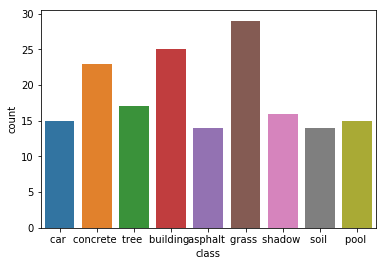

In [198]:
ax = sns.countplot(x = "class", data=data)

In [136]:
from sklearn import preprocessing 

le = preprocessing.LabelEncoder()
le.fit(['car ', 'concrete ', 'tree ', 'building ', 'asphalt ', 'grass ',
       'shadow ', 'soil ', 'pool '])
preprocessing.LabelEncoder()
list(le.classes_)
data['class'] = le.transform(data['class'])




In [137]:
data.head()


,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,2,1.27,91,0.97,231.38,1.39,1.47,207.92,241.74,244.48,...,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36
1,3,2.36,241,1.56,216.15,2.46,2.51,187.85,229.39,231.20,...,22.29,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14
2,3,2.12,266,1.47,232.18,2.07,2.21,206.54,244.22,245.79,...,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04
3,3,2.42,399,1.28,230.40,2.49,2.73,204.60,243.27,243.32,...,13.51,3.34,0.82,0.74,7.44,1.36,0.92,-0.09,1178,1125.38
4,3,2.15,944,1.73,193.18,2.28,4.10,165.98,205.55,208.00,...,15.65,50.08,0.85,0.49,8.15,0.23,1.00,-0.08,6232,1146.38


In [138]:
array = data.values

In [139]:
#array.reshape(-1, 1)

In [140]:
X = array[:,1:]
X.shape

(168, 147)

In [141]:
Y = array[:,0]
Y.shape

(168,)

In [142]:

X, Y

(array([[ 1.27000e+00,  9.10000e+01,  9.70000e-01, ..., -8.00000e-02,
          5.60000e+01,  3.80636e+03],
        [ 2.36000e+00,  2.41000e+02,  1.56000e+00, ..., -9.00000e-02,
          1.74600e+03,  1.45014e+03],
        [ 2.12000e+00,  2.66000e+02,  1.47000e+00, ..., -7.00000e-02,
          5.66000e+02,  1.09404e+03],
        ...,
        [ 2.97000e+00,  2.52000e+02,  1.73000e+00, ...,  6.00000e-02,
          9.48000e+02,  8.21840e+02],
        [ 1.57000e+00,  2.16000e+02,  1.27000e+00, ...,  9.00000e-02,
          2.54000e+02,  1.58072e+03],
        [ 2.12000e+00,  8.36000e+02,  8.80000e-01, ..., -9.00000e-02,
          3.02000e+03,  1.61155e+03]]),
 array([2., 3., 3., 3., 3., 8., 2., 2., 1., 8., 1., 0., 1., 4., 6., 1., 8.,
        7., 1., 6., 5., 6., 3., 8., 4., 3., 4., 1., 1., 1., 0., 6., 1., 4.,
        8., 1., 0., 8., 8., 3., 7., 8., 1., 1., 1., 4., 4., 6., 7., 7., 6.,
        8., 2., 2., 0., 5., 1., 8., 4., 4., 2., 2., 5., 2., 7., 4., 1., 3.,
        7., 7., 3., 1., 5., 5., 5

In [72]:
# B = np.reshape(Y, (-1, 1))

# Y = B
# Y

array([['car '],
       ['concrete '],
       ['concrete '],
       ['concrete '],
       ['concrete '],
       ['tree '],
       ['car '],
       ['car '],
       ['building '],
       ['tree '],
       ['building '],
       ['asphalt '],
       ['building '],
       ['grass '],
       ['shadow '],
       ['building '],
       ['tree '],
       ['soil '],
       ['building '],
       ['shadow '],
       ['pool '],
       ['shadow '],
       ['concrete '],
       ['tree '],
       ['grass '],
       ['concrete '],
       ['grass '],
       ['building '],
       ['building '],
       ['building '],
       ['asphalt '],
       ['shadow '],
       ['building '],
       ['grass '],
       ['tree '],
       ['building '],
       ['asphalt '],
       ['tree '],
       ['tree '],
       ['concrete '],
       ['soil '],
       ['tree '],
       ['building '],
       ['building '],
       ['building '],
       ['grass '],
       ['grass '],
       ['shadow '],
       ['soil '],
       ['soil ']

In [101]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [143]:
X[X >= 0]

C = np.reshape(X, (-1, 147))
C

array([[ 1.27000e+00,  9.10000e+01,  9.70000e-01, ..., -8.00000e-02,
         5.60000e+01,  3.80636e+03],
       [ 2.36000e+00,  2.41000e+02,  1.56000e+00, ..., -9.00000e-02,
         1.74600e+03,  1.45014e+03],
       [ 2.12000e+00,  2.66000e+02,  1.47000e+00, ..., -7.00000e-02,
         5.66000e+02,  1.09404e+03],
       ...,
       [ 2.97000e+00,  2.52000e+02,  1.73000e+00, ...,  6.00000e-02,
         9.48000e+02,  8.21840e+02],
       [ 1.57000e+00,  2.16000e+02,  1.27000e+00, ...,  9.00000e-02,
         2.54000e+02,  1.58072e+03],
       [ 2.12000e+00,  8.36000e+02,  8.80000e-01, ..., -9.00000e-02,
         3.02000e+03,  1.61155e+03]])

In [144]:
X.shape, Y.shape

((168, 147), (168,))

In [ ]:
X.shape, Y.shape

In [106]:
# # Feature extraction
# test = SelectKBest(score_func=chi2, k=4)
# fit = test.fit(X, Y)

# # Summarize scores
# np.set_printoptions(precision=3)
# print(fit.scores_)

# features = fit.transform(X)

# # Summarize selected features
# print(features[0:5,:])

In [145]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [146]:
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 6)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 6
Selected Features: [ True False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False]
Feature Ranking: [  1  93 114  83 132   5  40  65  50  12  17  24  49

In [147]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

Feature ranking:
1. feature 18 (0.028553)
2. feature 60 (0.026299)
3. feature 39 (0.024724)
4. feature 81 (0.023033)
5. feature 28 (0.020600)
6. feature 48 (0.018984)
7. feature 3 (0.017813)
8. feature 6 (0.017703)
9. feature 123 (0.016821)
10. feature 144 (0.015134)
11. feature 29 (0.015040)
12. feature 24 (0.014773)
13. feature 8 (0.014458)
14. feature 45 (0.014315)
15. feature 50 (0.014301)
16. feature 27 (0.014007)
17. feature 7 (0.013935)
18. feature 71 (0.013892)
19. feature 49 (0.013605)
20. feature 102 (0.013157)
21. feature 70 (0.013156)
22. feature 90 (0.012788)
23. feature 92 (0.012586)
24. feature 112 (0.012317)
25. feature 108 (0.011849)
26. feature 134 (0.011842)
27. feature 69 (0.011608)
28. feature 91 (0.011564)
29. feature 66 (0.011554)
30. feature 129 (0.011481)
31. feature 87 (0.010764)
32. feature 113 (0.010538)
33. feature 133 (0.010159)
34. feature 61 (0.009557)
35. feature 111 (0.009333)
36. feature 132 (0.008710)
37. feature 1 (0.008230)
38. feature 93 (0.008115

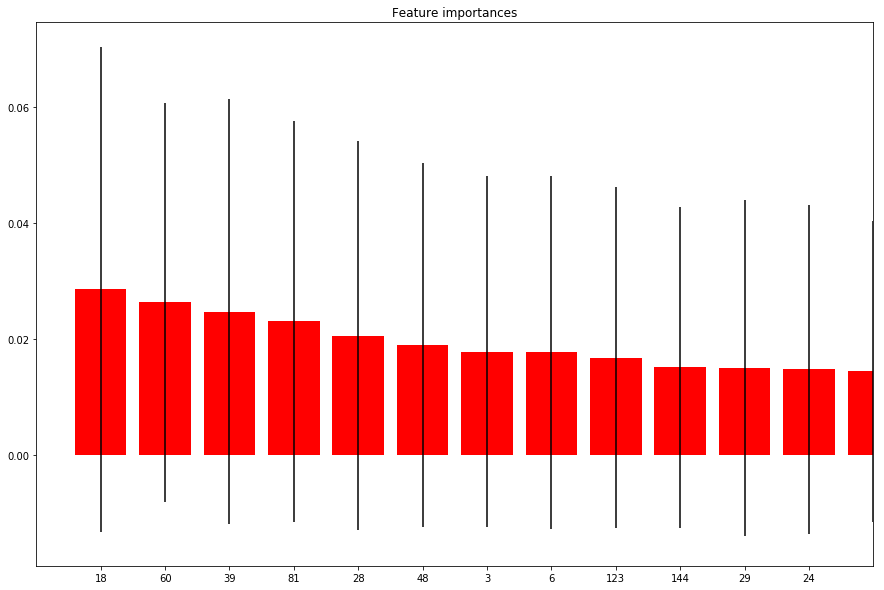

In [150]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, Y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

#Plot the feature importances of the forest
plt.figure(figsize=(15,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(12), indices)
plt.xlim([-1, 12])
plt.show()


In [171]:
test_data['class'] = le.transform(test_data['class'])


C:\Users\Pravesh\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:468: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


ValueError: y contains new labels: [0 1 2 3 4 5 6 7 8]

In [182]:
data['class'] = le.transform(data['class'])

In [183]:

x_train_data = data.drop(['class'], axis=1)
y_train_data = data["class"]

x_test_data = test_data.drop(['class'], axis=1)
y_test_data = test_data['class']


In [179]:
y_train_data

0      2
1      3
2      3
3      3
4      3
5      8
6      2
7      2
8      1
9      8
10     1
11     0
12     1
13     4
14     6
15     1
16     8
17     7
18     1
19     6
20     5
21     6
22     3
23     8
24     4
25     3
26     4
27     1
28     1
29     1
      ..
138    5
139    5
140    2
141    1
142    3
143    0
144    3
145    0
146    1
147    6
148    6
149    8
150    4
151    2
152    8
153    6
154    3
155    1
156    7
157    8
158    0
159    3
160    4
161    8
162    8
163    2
164    7
165    4
166    4
167    3
Name: class, Length: 168, dtype: int64

In [190]:
# from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# randomforest = RandomForestClassifier()
# randomforest.fit(x_train_data, y_train_data)

# y_pred = randomforest.predict(x_test_data)
# acc_randomforest = round(accuracy_score(y_pred, y_test_data) * 100, 2)

# print(acc_randomforest)
# print("Accuracy Score:"+str(acc_randomforest))
# print("Precision:"+str(average_precision_score(y_test_data,y_pred)))
# print("Recall:"+str(recall_score(y_test_data,y_pred)))
# print("Confusion Matrix:")
# cnf_matrix = confusion_matrix(y_pred, y_test_data)
# print(cnf_matrix)

In [200]:
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(x_train_data, y_train_data)
dtree_predictions = dtree_model.predict(x_test_data)

# creating a confusion matrix
cm = confusion_matrix(y_test_data, dtree_predictions)

In [201]:
acc_decision_tree = round(accuracy_score(y_pred, y_test_data) * 100, 2)
acc_decision_tree

78.11

In [199]:
cm

array([[29,  0,  0,  0,  2,  1, 10,  1,  2],
       [ 2, 63,  1, 16,  5,  3,  0,  7,  0],
       [ 0,  1, 13,  2,  0,  0,  0,  4,  1],
       [ 0,  8,  2, 54,  2,  1,  0, 25,  1],
       [ 1,  6,  0,  2, 57,  1,  2,  5,  9],
       [ 0,  1,  0,  0,  0, 12,  0,  0,  1],
       [12,  0,  1,  0,  0,  2, 23,  0,  7],
       [ 0,  2,  0,  3,  5,  1,  0,  8,  1],
       [ 0,  0,  0,  0, 37,  0, 14,  1, 37]], dtype=int64)

In [187]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(x_train_data, y_train_data)
svm_predictions = svm_model_linear.predict(x_test_data)
 
# model accuracy for X_test  
accuracy = svm_model_linear.score(x_test_data, y_test_data)
 
# creating a confusion matrix
cm = confusion_matrix(y_test_data, svm_predictions)

In [188]:
accuracy, cm

(0.5838264299802761, array([[29,  0,  0,  0,  2,  1, 10,  1,  2],
        [ 2, 63,  1, 16,  5,  3,  0,  7,  0],
        [ 0,  1, 13,  2,  0,  0,  0,  4,  1],
        [ 0,  8,  2, 54,  2,  1,  0, 25,  1],
        [ 1,  6,  0,  2, 57,  1,  2,  5,  9],
        [ 0,  1,  0,  0,  0, 12,  0,  0,  1],
        [12,  0,  1,  0,  0,  2, 23,  0,  7],
        [ 0,  2,  0,  3,  5,  1,  0,  8,  1],
        [ 0,  0,  0,  0, 37,  0, 14,  1, 37]], dtype=int64))

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [63]:
df = pd.read_csv(r"C:\Users\Pravesh\Documents\Assignments\ML Team Projects\Assignment 2\merged.csv",header=0,index_col=0)


In [64]:
df.head()

,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
class,,,,,,,,,,,,,,,,,,,,,
car,1.27,91,0.97,231.38,1.39,1.47,207.92,241.74,244.48,21.41,...,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36
concrete,2.36,241,1.56,216.15,2.46,2.51,187.85,229.39,231.20,6.57,...,22.29,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14
concrete,2.12,266,1.47,232.18,2.07,2.21,206.54,244.22,245.79,6.16,...,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04
concrete,2.42,399,1.28,230.40,2.49,2.73,204.60,243.27,243.32,5.76,...,13.51,3.34,0.82,0.74,7.44,1.36,0.92,-0.09,1178,1125.38
concrete,2.15,944,1.73,193.18,2.28,4.10,165.98,205.55,208.00,11.46,...,15.65,50.08,0.85,0.49,8.15,0.23,1.00,-0.08,6232,1146.38


In [15]:
df.shape

(675, 147)

In [65]:
'''Normalize data'''
normvalue = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
normvalue_scaled = min_max_scaler.fit_transform(normvalue)
df_new = pd.DataFrame(normvalue_scaled,columns=df.columns, index=df.index).reset_index()

'''Transform class name to numeric'''
df_new[["class"]]=df_new[["class"]].apply(LabelEncoder().fit_transform)

array = df_new.values
X = array[:,1:148]
Y = array[:,0]
#print(Y)

'''print the top 30 feature name'''
# Y = df_newtrain['class']
# X = pd.DataFrame(df_newtrain.drop(['class'], axis=1).values, columns=df_newtrain.drop(['class'], axis=1).columns)
# model= SelectKBest(chi2, k=30).fit(X,Y)
# selected_feature_names=X.columns[model.get_support(indices=True)]
# print('Feature list:', selected_feature_names)

'''find best scored 30 features'''
X_select_feature = SelectKBest(chi2, k=60).fit_transform(X, Y)
print('Score list:', X_select_feature)
print(X_select_feature.shape)
X_train = X_select_feature[0:168,:]
Y_train = array[0:168,0]
X_test = X_select_feature[168:,:]
Y_test = array[168:,0]

('Score list:', array([[ 0.01406983,  0.93384166,  0.82800752, ...,  0.43255107,
         0.40092009,  0.38356164],
       [ 0.04012507,  0.86430463,  0.73818475, ...,  0.34070572,
         0.33463963,  0.36986301],
       [ 0.0444676 ,  0.93749429,  0.82183136, ...,  0.2226912 ,
         0.22048049,  0.39726027],
       ..., 
       [ 0.11273233,  0.87868688,  0.74619585, ...,  0.20665203,
         0.20480491,  0.36986301],
       [ 0.01372242,  0.88133504,  0.72462406, ...,  0.58129326,
         0.58715284,  0.32876712],
       [ 0.02518673,  0.90539677,  0.75948801, ...,  0.14046936,
         0.13375362,  0.34246575]]))
(675L, 60L)


In [23]:
clf = RandomForestClassifier()

#clf = GaussianNB()

trained_model = clf.fit(X_train, Y_train)
predictions = trained_model.predict(X_test)


print("Trained model : ", trained_model)
print("Train Accuracy : ", accuracy_score(Y_train, trained_model.predict(X_train)))
print("Test Accuracy  : ", accuracy_score(Y_test, predictions))
print(classification_report(Y_test,predictions,digits=3))
print("Confusion matrix :\n", confusion_matrix(Y_test, predictions))
print("Confusion matrix :\n", confusion_matrix(Y_train, trained_model.predict(X_train)))

('Trained model : ', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))
('Train Accuracy : ', 0.98809523809523814)
('Test Accuracy  : ', 0.80867850098619332)
             precision    recall  f1-score   support

        0.0      0.889     0.889     0.889        45
        1.0      0.852     0.773     0.811        97
        2.0      0.541     0.952     0.690        21
        3.0      0.830     0.839     0.834        93
        4.0      0.753     0.843     0.795        83
        5.0      1.000     0.929     0.963        14
        6.0      0.820     0.911     0.863        45
        7.0      0.667     0.500     0.571    

In [147]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

In [148]:
X.shape, Y.shape

((675L, 147L), (675L,))

In [149]:
X_select_feature = SelectKBest(chi2, k=60).fit_transform(X, Y)

In [150]:
type(X_select_feature)

numpy.ndarray

In [151]:
data_dmatrix = xgb.DMatrix(data=X_select_feature, label=Y)

In [152]:
print(data_dmatrix)
#print(X.shape)

In [158]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_select_feature, Y, test_size=0.2, random_state=123)

In [171]:
xg_reg = xgb.XGBRegressor(objective ='multi:softmax', num_class = 9, colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 7, alpha = 10, n_estimators = 200)

In [172]:
xg_reg.fit(X_train2,y_train2)

preds = xg_reg.predict(X_test2)

In [173]:
#X_test2.shape, y_test2.shape

In [174]:
accuracy = accuracy_score(y_test2, preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.89%


In [192]:
############# With Cross Validation ############


params = {"objective":"multi:softmax", 'num_class' : 9, 'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 7, 'alpha': 10, 'n_estimators' : 200}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=10,
                    num_boost_round=50, early_stopping_rounds=5, metrics="merror", as_pandas=True, seed=123)


[16:50:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:50:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:50:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[16:50:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[16:50:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:50:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:50:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[16:50:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[16:50:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:50:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:50:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:50:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[16:50:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:50:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:50:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[16:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[16:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[16:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[16:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[16:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[16:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[16:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1

[16:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[16:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=4
[16:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[16:50:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:50:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:50:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[16:50:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[16:50:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:50:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[16:50:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[16:50:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:50:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[16:50:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[16:50:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:50:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:50:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:50:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[16:50:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[16:50:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:50:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:50:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[16:50:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[16:50:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:50:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[16:50:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:50:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:50:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[16:50:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:50:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[16:50:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:50:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

In [193]:
print(cv_results)

    test-merror-mean  test-merror-std  train-merror-mean  train-merror-std
0           0.291967         0.050001           0.233909          0.005745
1           0.247454         0.030800           0.189300          0.018320
2           0.232616         0.043941           0.171191          0.013289
3           0.219293         0.045847           0.160495          0.010785
4           0.214882         0.038598           0.157531          0.008438
5           0.216352         0.039712           0.151443          0.008717
6           0.214860         0.035536           0.143704          0.006556
7           0.213367         0.032868           0.141072          0.006497
8           0.211896         0.031496           0.138272          0.010729
9           0.207463         0.031573           0.138109          0.009722
10          0.204477         0.029831           0.136297          0.005514
11          0.205970         0.028883           0.133498          0.007815
12          0.201536     

In [185]:
#print("Accuracy: %.2f%% (%.2f%%)" % (cv_results[0].mean()*100, cv_results.std()*100))